# Elenco Direttori Sportivi (gare regionali)
```
!pip install fpdf
!pip install kaleido
!pip install dataframe_image
!pip install pandas
```

In [187]:
import fpdf
from fpdf import FPDF
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi


# Da modificare
dir_iscritti = "data/Iscritti_161307.xls"

TITLE       = "ELENCO DIRETTORI SPORTIVI"
LOCATION    = "Calcara (BO)"
DATE        = "31/07/22"
FILENAME    = "0731_Calcara"


# Elenco iscritti esportato in .csv
df = pd.read_excel(dir_iscritti)

team        = df["NomeSocieta"].unique()
idGara      = df["IdGara"][0]
nomeGara    = df["NomeGara"][0]
categoria   = df["Categoria"][0]
N           = len(team)

df          = pd.DataFrame(columns=["Nome","Tessera","Liv","Team","","Cellulare"])
df["Team"]  = team
df["Nome"]  = ["      "]*N
df.fillna('', inplace=True)

## Genera tabella

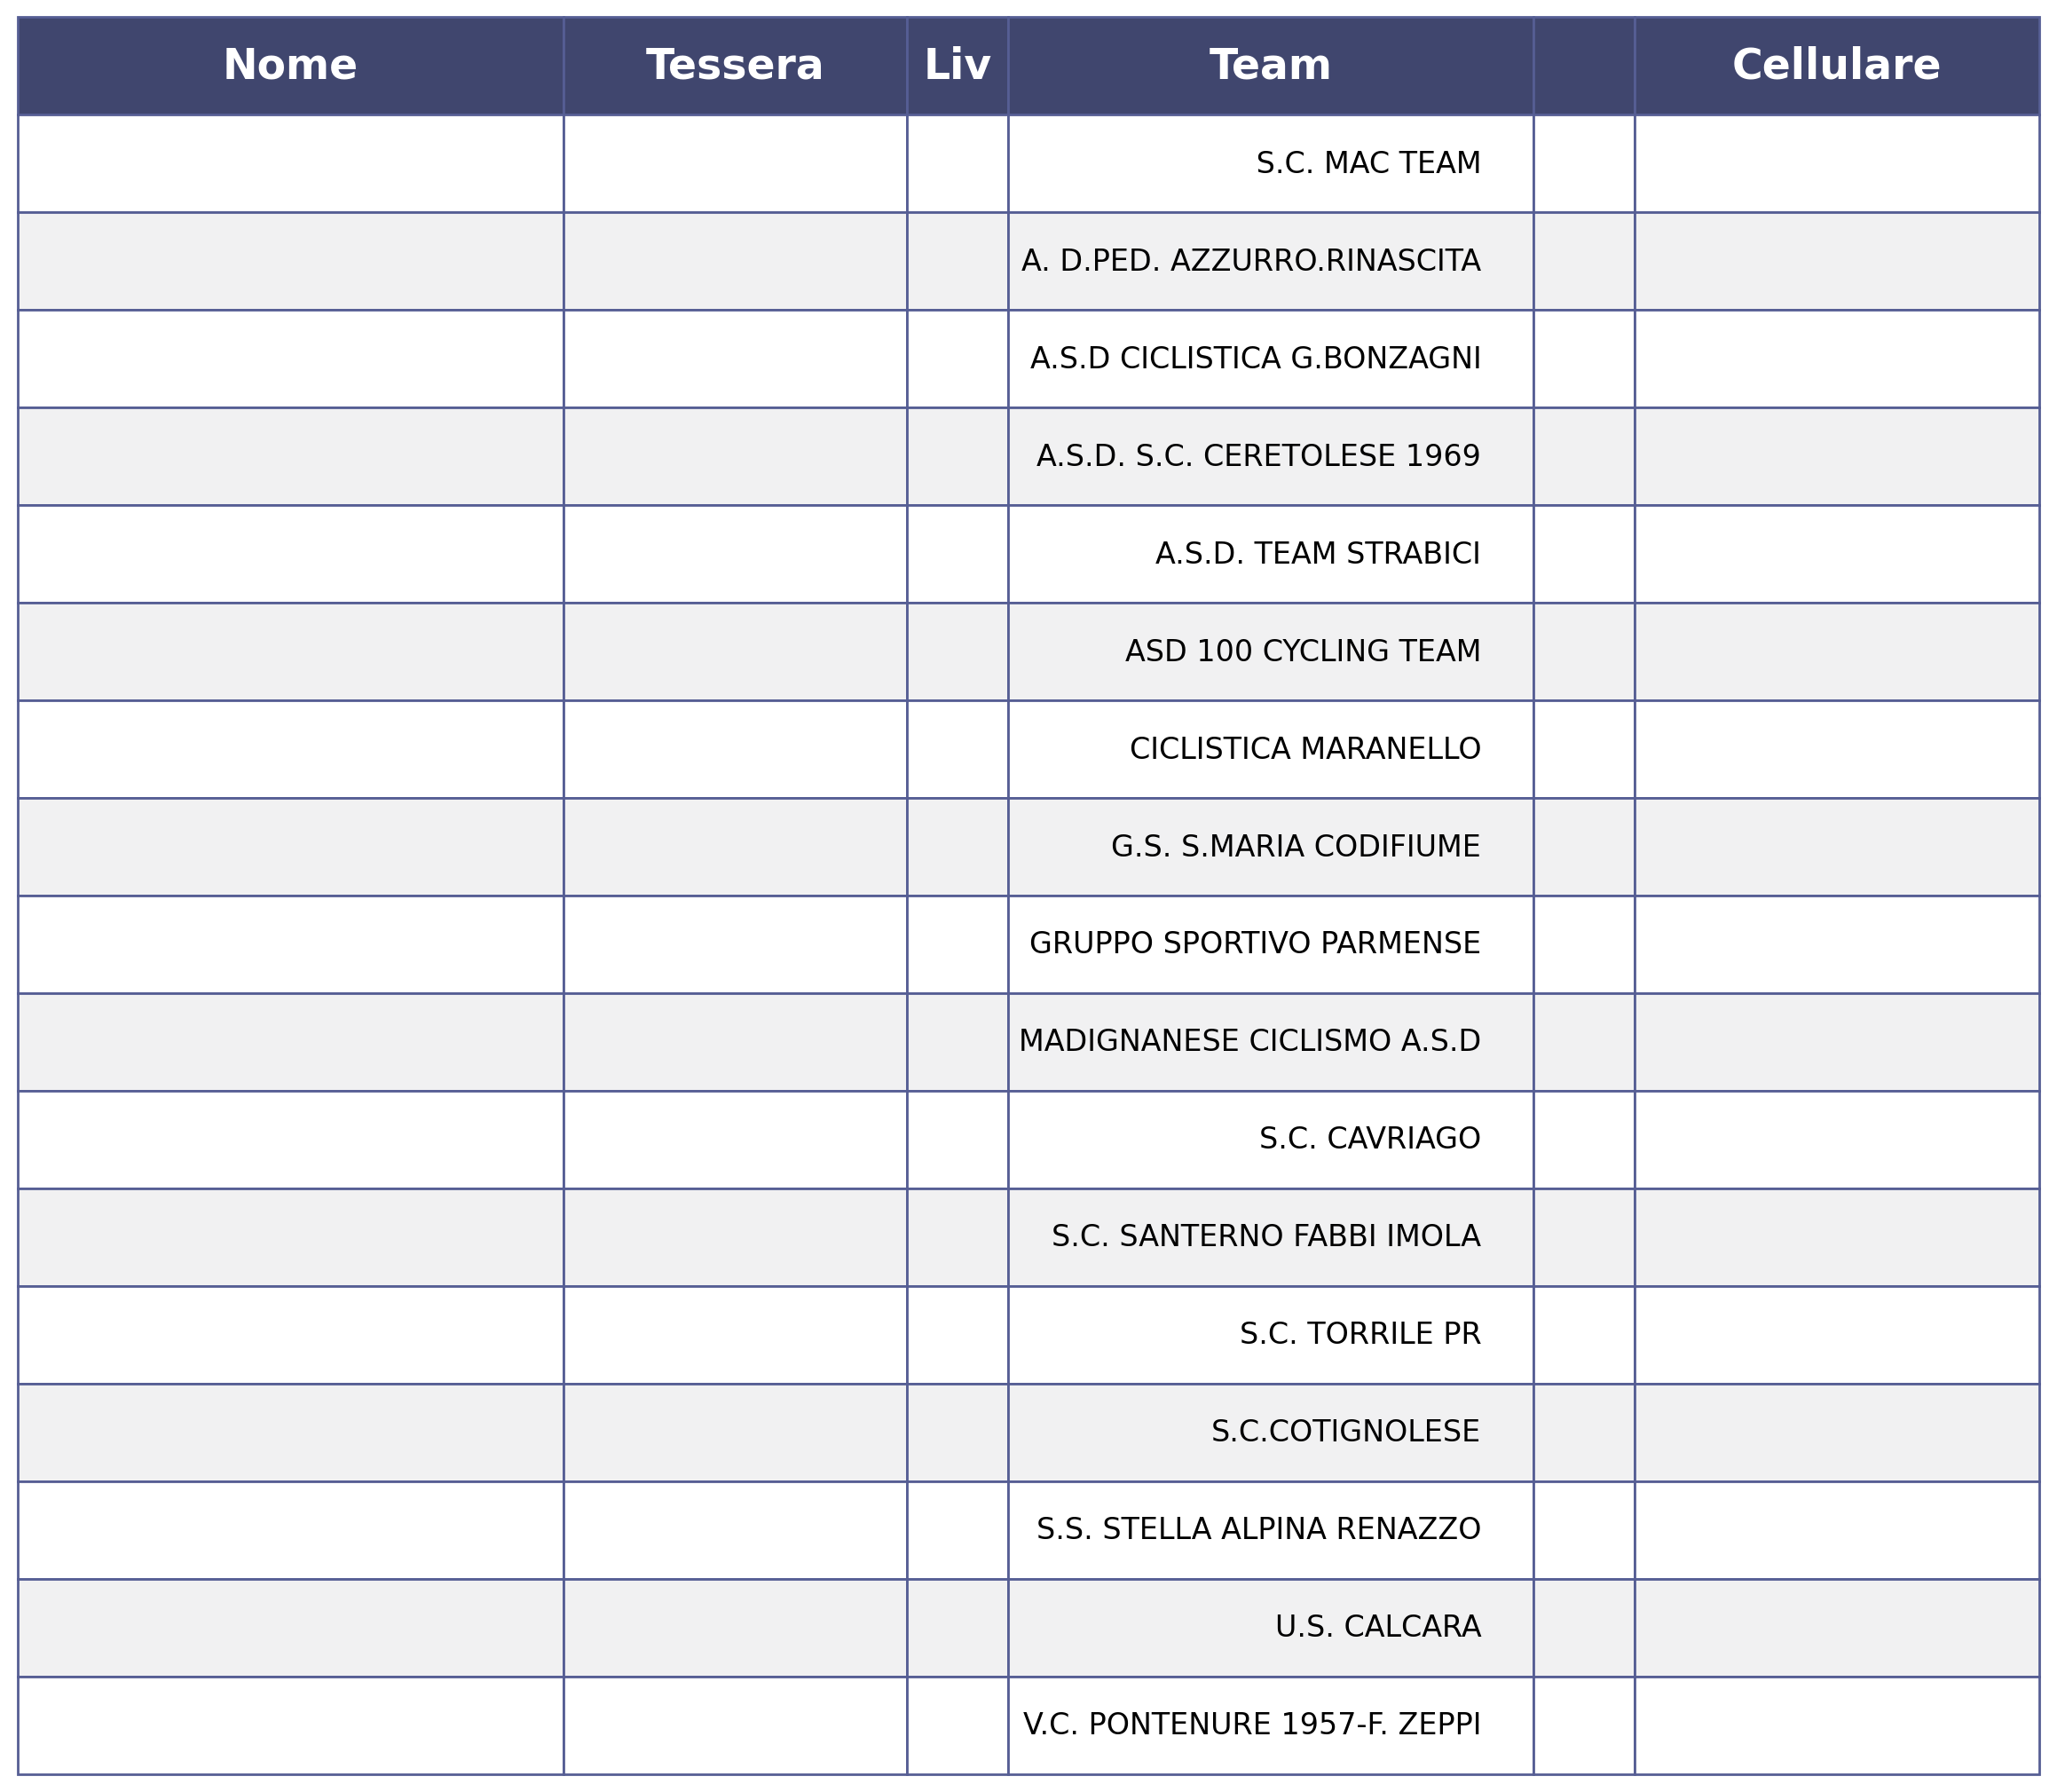

In [188]:
edge_color      = '#565e94'
header_color    = '#40466e'
row_colors      = ['#f1f1f2', 'w']
row_height      = 0.6

fig, ax = plt.subplots(figsize=(11.69, N*row_height), dpi=200)
ax.axis('off')


mpl_table = ax.table(cellText=df.values, colLabels=df.columns, 
                      bbox=[0,0,1,1], colWidths=[0.27, 0.17, 0.05, 0.26, 0.05, 0.20])
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(12)

for k, index in enumerate(mpl_table._cells):
    cell = mpl_table._cells[index]
    cell.set_edgecolor(edge_color)
    if index[0]==0:
        cell.set_text_props(weight='bold', color='w', size=17)
        cell.set_facecolor(header_color)        
    else:
        cell.set_facecolor(row_colors[index[0]%len(row_colors) ])

plt.tight_layout()
plt.savefig("/home/nic/al/commissaire/tmp/{:s}.png".format(FILENAME))

## Genera .pdf

In [189]:
def create_letterhead(pdf, WIDTH):
    pdf.image("resources/headerRegionale.png", 0, 8, WIDTH)

def create_title(pdf, title):
    pw = pdf.w - 2*pdf.l_margin
    pdf.set_font('Helvetica', 'b', 15)  
    pdf.ln(35)
    pdf.cell(pw, 0, title, 0, 0, 'C')
    pdf.ln(8)

def create_subtitle(pdf, title):
    pw = pdf.w - 2*pdf.l_margin
    pdf.set_font('Helvetica', '', 15)  
    pdf.cell(pw, 0, title, 0, 0, 'C')
    pdf.ln(10)

def create_paragraph(pdf, words):
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font('Helvetica', '', 12)
    pdf.write(5, words)


class PDF(FPDF):

    def footer(self):
        return
        # self.set_y(-15)
        # self.set_font('Helvetica', 'I', 8)
        # self.set_text_color(128)
        # self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')


WIDTH       = 210
HEIGHT      = 297
SUBTITLE    = "ID {:d}, {:s}, {:s}, {:s}".format(idGara, LOCATION, DATE, categoria)

# Create PDF
pdf = PDF() # A4 (210 by 297 mm)
pdf.set_margins(left=10, top=10, right=-10)
pdf.add_page()

create_letterhead(pdf, WIDTH)
create_title(pdf, TITLE)
create_subtitle(pdf, SUBTITLE)

# Add table
pdf.image("tmp/{:s}.png".format(FILENAME), w=190)
pdf.ln(10)

pdf.output("out/{:s}.pdf".format(FILENAME), 'F')

''